<a href=""><img src = "https://www.python.org/static/community_logos/python-logo-master-v3-TM.png" width = 400> </a>

<h1 align=center><font size = 5>Optimisation Problem</font></h1>

<h1 align=center><font size = 4> Munish Kumar </font></h1>
<h1 align=center><font size = 3> March 2023 </font></h1>

## Introduction

I am interested in solving the following optisation problem. 

Scenario: BP is embarking on the defining strategic pivot in its 111-year history. From Big Oil to Big Energy. BP has set an ambitious target to cut its carbon footprint to net zero by 2050. 

As part of this plan, BP plans to cut oil and gas production by 1.5 million boe/d (50%) over the next decade. Asset disposals will be key to BP hitting this target. 

BP has issued two points of guidance on high-level production:
 - Target production to 2030: BP plans to cut oil and gas production by 50% over the next decade, from 3.0 million boe/d in 2019, to 2.0 million boe/d in 2025, to 1.5 million boe/d in 2030. These numbers and target exclude BP’s 19.75% equity stake in Rosneft.
 - Long-term production target of an oil-gas mix of approximately 50:50.

------------

In [1]:
#!pip install pyomo

In [2]:
# General Libraries
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
import pyomo.environ as pyo
from pyomo.opt import SolverFactory
import time
import re
import requests
import pickle
import seaborn as sns
import os
import glob
import sys
sns.set()

# Sklearn Liraries
from sklearn import preprocessing

from datetime import timedelta, date 
start = time.time()
%matplotlib inline

# Forces the print statement to show everything and not truncate
# np.set_printoptions(threshold=sys.maxsize) 
print('Libraries imported')

Libraries imported


###### Series of Functions

In [3]:
# Function to look at first 5 and last 5 elements in a dataframe
def ends(df, x=5):
    return df.head(x).append(df.tail(x))
setattr(pd.DataFrame,'ends',ends)

In [4]:
# Function to read out file
def file_out(df, dir_name, base_filename, filename_suffix):
    try:
        csvs_sht = os.path.join(dir_name, base_filename + "." + filename_suffix)
        df.to_csv(csvs_sht, index = False, header=True)
        print ("Final File Extract Produced")
    except IOError:
        print("I/O error")
    returnb

In [5]:
# Function to search for a text string
def search_words(text):
    result = re.findall(r'\b[^\d\W]+\b', text)
    return " ".join(result)

In [6]:
# Font, marker size and axis rotation
edgecolors = 'black'
markersize = 16
fontsize = 16
alpha = 0.5
size = 18
rotation = 0

### Part 1: Understanding the Cash Flow

##### Read in the data and some preprocessing

In [7]:
# load dataframe with package details
df_NCF = pd.read_excel('BP Case Study_Data.xlsx',
                        #header=[0, 1], 
                       sheet_name='BP by Net cash flow',
                       keep_default_na=False,
                       #skiprows=range(20),
                       skipfooter=6
                      )

df_NCF.rename(columns={'Year':'Country'}, inplace = True)
print ('Data read into a pandas dataframe!')
df_NCF.ends(10)

Data read into a pandas dataframe!


,Country,2020,2021,2022,2023,2024,2025,2026,2027,2028,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Russian Federation,1909.02,2038.39,2353.09,2481.09,2693.65,2618.93,2467.86,2624.64,2731.87,...,2054.56,1910.45,1812.44,1728.37,1673.81,1630.60,1511.78,1450.27,1388.37,1325.74
1,United States,1812.13,3037.82,3909.68,3407.76,3782.06,3742.09,3556.07,3615.59,3386.42,...,1981.68,1784.43,1663.80,1817.59,1580.33,1432.84,1269.25,1108.71,601.97,338.43
2,United Kingdom,794.58,1208.90,1265.77,1356.42,1047.96,720.25,608.47,686.94,667.82,...,140.36,36.05,129.03,126.54,80.07,101.61,102.14,84.54,88.73,61.68
3,Egypt,521.81,1952.82,2120.27,2146.94,1744.69,1485.92,1496.72,1532.58,1405.22,...,132.95,92.60,2.87,40.76,35.75,28.88,15.20,14.41,14.05,11.01
4,Oman,499.65,1084.96,1392.42,1427.19,1494.29,1194.59,849.29,865.93,895.80,...,222.61,193.50,170.74,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,Azerbaijan,460.77,458.15,482.93,593.92,680.28,700.59,829.87,715.82,486.04,...,598.80,566.87,538.64,513.47,471.70,416.97,390.14,329.62,263.67,199.54
6,Angola,451.64,331.09,-177.24,-497.47,262.17,750.37,655.88,444.54,157.83,...,16.21,9.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,Australia,317.16,329.79,225.52,410.62,169.52,-158.08,-569.93,-592.63,-439.15,...,595.04,590.14,423.84,421.50,451.56,435.72,437.89,464.07,454.93,457.28
8,Trinidad and Tobago,288.37,365.79,179.53,265.09,222.34,290.73,321.73,210.87,36.43,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,Iraq,204.96,213.77,222.43,230.02,231.23,238.35,240.58,232.09,216.78,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


#### Select County column as Index

In [8]:
df_NCF.set_index('Country', inplace=True)
df_NCF.ends(5)

,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Country,,,,,,,,,,,,,,,,,,,,,
Russian Federation,1909.02,2038.39,2353.09,2481.09,2693.65,2618.93,2467.86,2624.64,2731.87,2801.08,...,2054.56,1910.45,1812.44,1728.37,1673.81,1630.60,1511.78,1450.27,1388.37,1325.74
United States,1812.13,3037.82,3909.68,3407.76,3782.06,3742.09,3556.07,3615.59,3386.42,3550.09,...,1981.68,1784.43,1663.80,1817.59,1580.33,1432.84,1269.25,1108.71,601.97,338.43
United Kingdom,794.58,1208.90,1265.77,1356.42,1047.96,720.25,608.47,686.94,667.82,887.08,...,140.36,36.05,129.03,126.54,80.07,101.61,102.14,84.54,88.73,61.68
Egypt,521.81,1952.82,2120.27,2146.94,1744.69,1485.92,1496.72,1532.58,1405.22,1354.94,...,132.95,92.60,2.87,40.76,35.75,28.88,15.20,14.41,14.05,11.01
Oman,499.65,1084.96,1392.42,1427.19,1494.29,1194.59,849.29,865.93,895.80,915.36,...,222.61,193.50,170.74,0.00,0.00,0.00,0.00,0.00,0.00,0.00
United Arab Emirates,-16.10,167.30,246.17,253.82,278.78,275.02,287.11,292.75,313.28,321.27,...,358.49,361.44,341.61,347.26,350.17,353.46,356.90,341.01,320.29,346.96
Senegal,-119.99,-231.19,-230.26,-144.83,-341.73,-851.54,-988.54,-693.53,11.21,540.09,...,398.67,407.38,416.26,345.23,352.53,359.98,367.59,375.35,383.27,391.36
Mexico,-127.25,-97.32,-19.92,120.78,117.96,114.82,82.28,62.36,27.49,26.06,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Mauritania,-133.29,-256.81,-255.78,-151.69,-363.50,-940.35,-1093.34,-762.59,-3.00,598.49,...,477.32,472.20,482.18,423.69,418.81,427.57,436.50,445.61,432.54,441.56


In [9]:
# Convert all column names to a string which will be used for plotting later
df_NCF.columns = list(map(int, df_NCF.columns))

min_yr = min(df_NCF.columns.values)
max_yr = max(df_NCF.columns.values)+1
pt_yr = 2031

#years = list(map(int, range(min_yr, max_yr)))
years = list(map(int, range(min_yr, pt_yr)))
years


[2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]

In [10]:
df_NCF_T = df_NCF.transpose()
df_NCF_T

Country,Russian Federation,United States,United Kingdom,Egypt,Oman,Azerbaijan,Angola,Australia,Trinidad and Tobago,Iraq,...,Algeria,Bolivia,Vietnam,Venezuela,Canada,United Arab Emirates,Senegal,Mexico,Mauritania,India
2020,1909.02,1812.13,794.58,521.81,499.65,460.77,451.64,317.16,288.37,204.96,...,26.72,14.78,9.83,0.8,-15.55,-16.10,-119.99,-127.25,-133.29,-516.24
2021,2038.39,3037.82,1208.90,1952.82,1084.96,458.15,331.09,329.79,365.79,213.77,...,134.98,16.36,8.65,0.0,-3.96,167.30,-231.19,-97.32,-256.81,-290.22
2022,2353.09,3909.68,1265.77,2120.27,1392.42,482.93,-177.24,225.52,179.53,222.43,...,73.05,11.95,4.32,0.0,-0.67,246.17,-230.26,-19.92,-255.78,10.24
2023,2481.09,3407.76,1356.42,2146.94,1427.19,593.92,-497.47,410.62,265.09,230.02,...,66.81,13.06,2.78,0.0,36.90,253.82,-144.83,120.78,-151.69,240.11
2024,2693.65,3782.06,1047.96,1744.69,1494.29,680.28,262.17,169.52,222.34,231.23,...,93.01,11.38,-7.89,0.0,-44.10,278.78,-341.73,117.96,-363.50,178.48
2025,2618.93,3742.09,720.25,1485.92,1194.59,700.59,750.37,-158.08,290.73,238.35,...,93.91,5.48,-4.13,0.0,-75.63,275.02,-851.54,114.82,-940.35,382.15
2026,2467.86,3556.07,608.47,1496.72,849.29,829.87,655.88,-569.93,321.73,240.58,...,91.65,7.17,4.87,0.0,-7.05,287.11,-988.54,82.28,-1093.34,430.67
2027,2624.64,3615.59,686.94,1532.58,865.93,715.82,444.54,-592.63,210.87,232.09,...,77.91,4.86,7.84,0.0,-87.28,292.75,-693.53,62.36,-762.59,341.40
2028,2731.87,3386.42,667.82,1405.22,895.80,486.04,157.83,-439.15,36.43,216.78,...,19.12,-0.50,4.32,0.0,-231.34,313.28,11.21,27.49,-3.00,330.46
2029,2801.08,3550.09,887.08,1354.94,915.36,473.85,-47.80,-128.06,55.56,204.77,...,19.54,7.41,4.49,0.0,-414.35,321.27,540.09,26.06,598.49,313.58


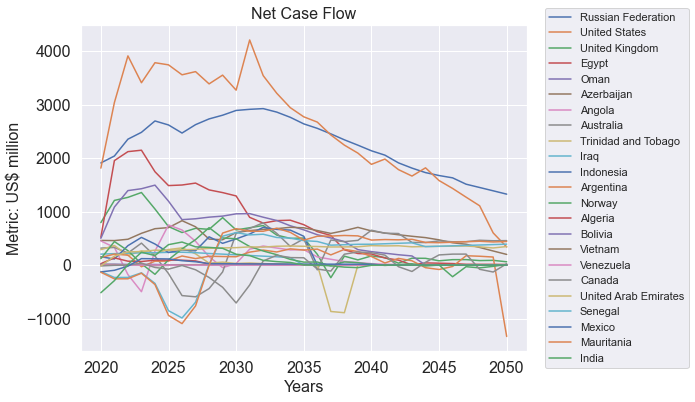

In [11]:
df_NCF_T.index = df_NCF_T.index.map(int) # Change index values to integer for plotting

df_NCF_T.plot(kind='line',figsize = (8,6), fontsize = fontsize)
plt.title('Net Case Flow', fontsize = fontsize)
plt.ylabel('Metric: US$ million', fontsize = fontsize)
plt.xlabel('Years', fontsize = fontsize)
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.grid(True)
plt.show()

In [12]:
# Adding a Total column per country over the years
df_NCF.dropna(axis='columns', inplace = True)
df_NCF['Total'] = df_NCF.sum(axis = 1)
df_NCF.ends(5)

,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,...,2042,2043,2044,2045,2046,2047,2048,2049,2050,Total
Country,,,,,,,,,,,,,,,,,,,,,
Russian Federation,1909.02,2038.39,2353.09,2481.09,2693.65,2618.93,2467.86,2624.64,2731.87,2801.08,...,1910.45,1812.44,1728.37,1673.81,1630.60,1511.78,1450.27,1388.37,1325.74,69918.58
United States,1812.13,3037.82,3909.68,3407.76,3782.06,3742.09,3556.07,3615.59,3386.42,3550.09,...,1784.43,1663.80,1817.59,1580.33,1432.84,1269.25,1108.71,601.97,338.43,78643.28
United Kingdom,794.58,1208.90,1265.77,1356.42,1047.96,720.25,608.47,686.94,667.82,887.08,...,36.05,129.03,126.54,80.07,101.61,102.14,84.54,88.73,61.68,14256.21
Egypt,521.81,1952.82,2120.27,2146.94,1744.69,1485.92,1496.72,1532.58,1405.22,1354.94,...,92.60,2.87,40.76,35.75,28.88,15.20,14.41,14.05,11.01,23433.43
Oman,499.65,1084.96,1392.42,1427.19,1494.29,1194.59,849.29,865.93,895.80,915.36,...,193.50,170.74,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18303.84
United Arab Emirates,-16.10,167.30,246.17,253.82,278.78,275.02,287.11,292.75,313.28,321.27,...,361.44,341.61,347.26,350.17,353.46,356.90,341.01,320.29,346.96,9691.68
Senegal,-119.99,-231.19,-230.26,-144.83,-341.73,-851.54,-988.54,-693.53,11.21,540.09,...,407.38,416.26,345.23,352.53,359.98,367.59,375.35,383.27,391.36,5947.66
Mexico,-127.25,-97.32,-19.92,120.78,117.96,114.82,82.28,62.36,27.49,26.06,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,515.75
Mauritania,-133.29,-256.81,-255.78,-151.69,-363.50,-940.35,-1093.34,-762.59,-3.00,598.49,...,472.20,482.18,423.69,418.81,427.57,436.50,445.61,432.54,441.56,7458.66


In [13]:
# We will sort on this column to get our top 5 countries using pandas sort_values() method.
# inplace = True paramemter saves the changes to the original df_can dataframe
df_NCF.sort_values(by='Total', ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_NCF_top5 = df_NCF.head(5)

# transpose the dataframe
df_NCF_top5 = df_NCF_top5[years].transpose()

print(df_NCF_top5)

Country  United States  Russian Federation    Egypt     Oman  Azerbaijan
2020           1812.13             1909.02   521.81   499.65      460.77
2021           3037.82             2038.39  1952.82  1084.96      458.15
2022           3909.68             2353.09  2120.27  1392.42      482.93
2023           3407.76             2481.09  2146.94  1427.19      593.92
2024           3782.06             2693.65  1744.69  1494.29      680.28
2025           3742.09             2618.93  1485.92  1194.59      700.59
2026           3556.07             2467.86  1496.72   849.29      829.87
2027           3615.59             2624.64  1532.58   865.93      715.82
2028           3386.42             2731.87  1405.22   895.80      486.04
2029           3550.09             2801.08  1354.94   915.36      473.85
2030           3268.96             2890.02  1292.21   957.97      608.86


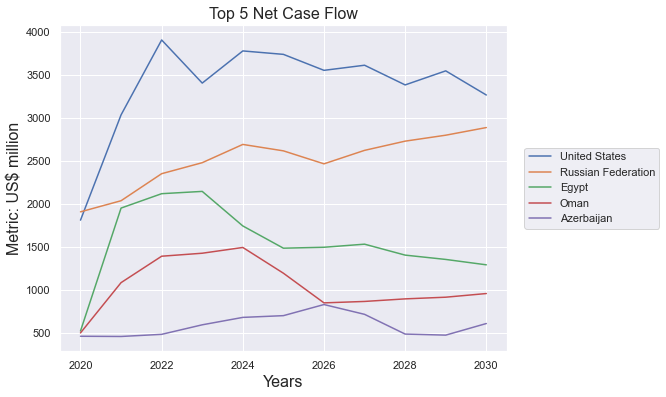

In [14]:
# Plot the dataframe. 
df_NCF_top5.index = df_NCF_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_NCF_top5.plot(kind='line', figsize=(8, 6)) 

plt.title('Top 5 Net Case Flow', fontsize = fontsize)
plt.ylabel('Metric: US$ million', fontsize = fontsize)
plt.xlabel('Years', fontsize = fontsize)
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.grid(True)
plt.show()

Country  Canada  Venezuela  Vietnam  Bolivia  Mexico
2020     -15.55        0.8     9.83    14.78 -127.25
2021      -3.96        0.0     8.65    16.36  -97.32
2022      -0.67        0.0     4.32    11.95  -19.92
2023      36.90        0.0     2.78    13.06  120.78
2024     -44.10        0.0    -7.89    11.38  117.96
2025     -75.63        0.0    -4.13     5.48  114.82
2026      -7.05        0.0     4.87     7.17   82.28
2027     -87.28        0.0     7.84     4.86   62.36
2028    -231.34        0.0     4.32    -0.50   27.49
2029    -414.35        0.0     4.49     7.41   26.06
2030    -707.61        0.0     4.20     5.56   24.06


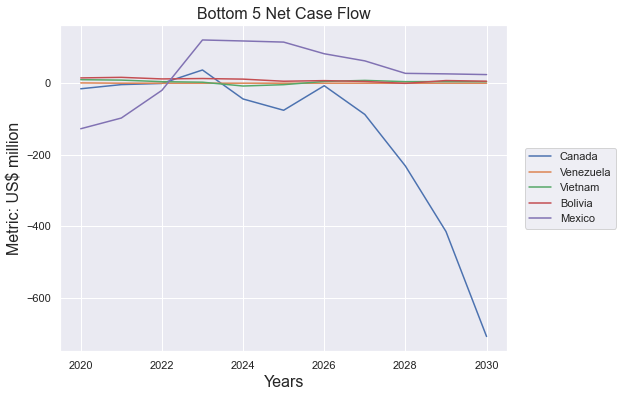

In [15]:
# We will sort on this column to get our bottom 5 countries using pandas sort_values() method.
# inplace = True paramemter saves the changes to the original df_can dataframe
df_NCF.sort_values(by='Total', ascending=True, axis=0, inplace=True)

# get the top 5 entries
df_NCF_bottom5 = df_NCF.head(5)

# transpose the dataframe
df_NCF_bottom5 = df_NCF_bottom5[years].transpose()

print(df_NCF_bottom5)

# Plot the dataframe. 
df_NCF_bottom5.index = df_NCF_bottom5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_NCF_bottom5.plot(kind='line', figsize=(8, 6)) 

plt.title('Bottom 5 Net Case Flow', fontsize = fontsize)
plt.ylabel('Metric: US$ million', fontsize = fontsize)
plt.xlabel('Years', fontsize = fontsize)
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.grid(True)
plt.show()

I have determined that the poorers performers (in terms of cash flow) are Canada, Venezuela, Vietnam, Bolivia and Mexico. These would be my targets for removal first. The question now is if removing these countries optimises the liquids ratio as required by BP.

### Part 2: Selecting the assets to divest
#### To do this, I will treat this as an optimisation issue

In [16]:
# load dataframe with package details
df_NCF = pd.read_excel('BP Case Study_Data.xlsx',
                        #header=[0, 1], 
                       sheet_name='BP by Net cash flow',
                       keep_default_na=False,
                       #skiprows=range(20),
                       skipfooter=6
                      )

df_NCF.rename(columns={'Year':'Country'}, inplace = True)
print ('Data read into a pandas dataframe!')

# Adding a Total column per country over the years
df_NCF.dropna(axis='columns', inplace = True)
df_NCF['Total'] = df_NCF.sum(axis = 1)
df_NCF.sort_values("Country", ascending=True, inplace = True)
df_NCF = df_NCF.reset_index(drop=True)

df_NCF.set_index('Country', inplace=True)

print(f'Size of Dataframe: rows:{df_NCF.shape[0]}, columns:{df_NCF.shape[1]}')
df_NCF.ends(4)

Data read into a pandas dataframe!
Size of Dataframe: rows:23, columns:32


C:\Users\quant\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  from ipykernel import kernelapp as app


,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,...,2042,2043,2044,2045,2046,2047,2048,2049,2050,Total
Country,,,,,,,,,,,,,,,,,,,,,
Algeria,26.72,134.98,73.05,66.81,93.01,93.91,91.65,77.91,19.12,19.54,...,-0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,769.86
Angola,451.64,331.09,-177.24,-497.47,262.17,750.37,655.88,444.54,157.83,-47.80,...,9.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4336.07
Argentina,143.21,204.82,186.04,-30.57,72.68,74.03,170.02,121.31,165.38,160.34,...,125.27,80.30,-48.47,-82.17,-25.95,174.98,165.45,150.65,-1333.91,3218.91
Australia,317.16,329.79,225.52,410.62,169.52,-158.08,-569.93,-592.63,-439.15,-128.06,...,590.14,423.84,421.50,451.56,435.72,437.89,464.07,454.93,457.28,9729.37
United Kingdom,794.58,1208.90,1265.77,1356.42,1047.96,720.25,608.47,686.94,667.82,887.08,...,36.05,129.03,126.54,80.07,101.61,102.14,84.54,88.73,61.68,14256.21
United States,1812.13,3037.82,3909.68,3407.76,3782.06,3742.09,3556.07,3615.59,3386.42,3550.09,...,1784.43,1663.80,1817.59,1580.33,1432.84,1269.25,1108.71,601.97,338.43,78643.28
Venezuela,0.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.80
Vietnam,9.83,8.65,4.32,2.78,-7.89,-4.13,4.87,7.84,4.32,4.49,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,56.98


In [17]:
# load dataframe with package details
df_LP = pd.read_excel('BP Case Study_Data.xlsx',
                        #header=[0, 1], 
                       sheet_name='BP by Liquid production',
                       keep_default_na=False,
                       #skiprows=range(20),
                       skipfooter=6
                      )

df_LP.rename(columns={'Year':'Country'}, inplace = True)
df_LP.sort_values("Country", ascending=True, inplace = True)
df_LP = df_LP.reset_index(drop=True)
print ('Data read into a pandas dataframe!')

df_LP.set_index('Country', inplace=True)

_, df_LP = df_NCF.align(df_LP, fill_value=0)

print(f'Size of Dataframe: rows:{df_LP.shape[0]}, columns:{df_LP.shape[1]}')
df_LP.ends(4)

Data read into a pandas dataframe!
Size of Dataframe: rows:23, columns:32


,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,...,2042,2043,2044,2045,2046,2047,2048,2049,2050,Total
Country,,,,,,,,,,,,,,,,,,,,,
Algeria,12.80,11.52,10.37,9.69,9.47,9.63,9.28,8.44,3.28,3.28,...,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
Angola,136.40,123.95,112.66,111.21,120.53,120.18,103.42,77.94,62.17,50.88,...,2.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
Argentina,52.49,55.02,56.51,57.25,58.58,57.30,55.81,54.05,52.01,50.17,...,22.33,21.20,20.27,19.07,18.16,17.27,16.46,15.59,1.41,0
Australia,11.17,10.29,9.08,9.22,7.95,6.76,5.76,5.00,4.29,7.69,...,9.67,9.50,9.34,9.17,8.92,8.56,8.20,7.82,7.47,0
United Kingdom,115.49,132.60,136.26,135.11,123.01,116.07,104.22,93.58,98.34,97.18,...,20.57,18.18,16.37,15.11,13.94,12.81,11.77,10.33,9.38,0
United States,429.86,464.34,543.93,536.89,533.51,517.51,502.66,490.40,489.12,465.02,...,138.69,129.54,114.87,102.21,88.16,77.62,70.03,63.16,57.03,0
Venezuela,1.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
Vietnam,0.09,0.08,0.06,0.05,0.04,0.02,0.01,0.01,0.01,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In order to satisfy the two points of guidance on high-level production i.e.:
 - Target production to 2030: BP plans to cut oil and gas production by 50% over the next decade, from 3.0 million boe/d in 2019, to 2.0 million boe/d in 2025, to 1.5 million boe/d in 2030. These numbers and target exclude BP’s 19.75% equity stake in Rosneft.
 - Long-term production target of an oil-gas mix of approximately 50:50.
 
I will ensure production ranges meet the targets at those points

In [18]:
# load dataframe with package details
df_GP = pd.read_excel('BP Case Study_Data.xlsx',
                        #header=[0, 1], 
                       sheet_name='BP by Gas production',
                       keep_default_na=False,
                       #skiprows=range(20),
                       skipfooter=9
                      )

df_GP.rename(columns={'Year':'Country'}, inplace = True)
df_GP.sort_values("Country", ascending=True, inplace = True)
df_GP = df_GP.reset_index(drop=True)
df_GP.set_index('Country', inplace=True)

_, df_GP = df_NCF.align(df_GP, fill_value=0)

print ('Data read into a pandas dataframe!')
print(f'Size of Dataframe: rows:{df_GP.shape[0]}, columns:{df_GP.shape[1]}')
df_GP.ends(4)

Data read into a pandas dataframe!
Size of Dataframe: rows:23, columns:32


,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,...,2042,2043,2044,2045,2046,2047,2048,2049,2050,Total
Country,,,,,,,,,,,,,,,,,,,,,
Algeria,34.77232,31.52688,28.76720,26.21168,24.14192,22.38368,20.70640,18.72464,1.17744,1.15456,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
Angola,21.91376,19.53424,17.74784,15.96320,18.92528,21.78880,21.11120,22.08976,20.57088,19.70848,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
Argentina,39.87456,38.61440,38.32224,40.54512,42.90352,44.54736,45.78464,45.60688,46.71920,47.76464,...,27.70064,25.03600,21.88032,20.42480,19.20688,18.14736,17.21808,16.34160,11.85536,0
Australia,71.88192,68.41296,70.81184,65.19216,60.02480,55.27280,46.88288,39.78480,33.78144,47.28240,...,46.49568,46.45520,46.42000,46.38480,46.35136,46.31616,46.28272,46.25104,46.21408,0
United Kingdom,41.82464,51.55392,51.04704,54.13056,46.65936,41.97952,41.06256,40.13856,35.09264,30.01152,...,0.79376,0.71456,0.63536,0.55616,0.55616,0.55616,0.47696,0.00000,0.00000,0
United States,371.63632,371.45328,389.29264,432.42144,477.25568,526.91408,575.45840,607.05216,635.73312,647.38960,...,318.45968,297.28160,268.62000,243.43440,218.67296,200.75616,185.40720,171.48384,158.47040,0
Venezuela,0.18656,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
Vietnam,3.58864,3.04128,2.37248,1.82512,1.33760,2.07856,2.54672,2.42528,2.30384,1.99936,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0


-------------------------------------------------------

The model will be a binary decision, where if it is selected to meet the objective function, it is labelled as '1'.

In [19]:
df_NCF = df_NCF.reset_index(drop=False)
df_NCF

,Country,2020,2021,2022,2023,2024,2025,2026,2027,2028,...,2042,2043,2044,2045,2046,2047,2048,2049,2050,Total
0,Algeria,26.72,134.98,73.05,66.81,93.01,93.91,91.65,77.91,19.12,...,-0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,769.86
1,Angola,451.64,331.09,-177.24,-497.47,262.17,750.37,655.88,444.54,157.83,...,9.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4336.07
2,Argentina,143.21,204.82,186.04,-30.57,72.68,74.03,170.02,121.31,165.38,...,125.27,80.30,-48.47,-82.17,-25.95,174.98,165.45,150.65,-1333.91,3218.91
3,Australia,317.16,329.79,225.52,410.62,169.52,-158.08,-569.93,-592.63,-439.15,...,590.14,423.84,421.50,451.56,435.72,437.89,464.07,454.93,457.28,9729.37
4,Azerbaijan,460.77,458.15,482.93,593.92,680.28,700.59,829.87,715.82,486.04,...,566.87,538.64,513.47,471.70,416.97,390.14,329.62,263.67,199.54,17401.28
5,Bolivia,14.78,16.36,11.95,13.06,11.38,5.48,7.17,4.86,-0.50,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,108.20
6,Canada,-15.55,-3.96,-0.67,36.90,-44.10,-75.63,-7.05,-87.28,-231.34,...,-29.97,-119.41,52.23,190.07,205.04,205.45,-78.73,-129.15,24.79,-383.32
7,Egypt,521.81,1952.82,2120.27,2146.94,1744.69,1485.92,1496.72,1532.58,1405.22,...,92.60,2.87,40.76,35.75,28.88,15.20,14.41,14.05,11.01,23433.43
8,India,-516.24,-290.22,10.24,240.11,178.48,382.15,430.67,341.40,330.46,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1902.81
9,Indonesia,156.28,113.60,363.20,517.44,394.10,235.24,282.62,267.83,528.71,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6900.97


In [20]:
df_LP = df_LP.reset_index(drop=False)
df_LP

,Country,2020,2021,2022,2023,2024,2025,2026,2027,2028,...,2042,2043,2044,2045,2046,2047,2048,2049,2050,Total
0,Algeria,12.80,11.52,10.37,9.69,9.47,9.63,9.28,8.44,3.28,...,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
1,Angola,136.40,123.95,112.66,111.21,120.53,120.18,103.42,77.94,62.17,...,2.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
2,Argentina,52.49,55.02,56.51,57.25,58.58,57.30,55.81,54.05,52.01,...,22.33,21.20,20.27,19.07,18.16,17.27,16.46,15.59,1.41,0
3,Australia,11.17,10.29,9.08,9.22,7.95,6.76,5.76,5.00,4.29,...,9.67,9.50,9.34,9.17,8.92,8.56,8.20,7.82,7.47,0
4,Azerbaijan,174.50,169.22,164.79,165.66,171.17,174.84,169.21,160.82,150.37,...,50.98,46.78,43.01,39.08,33.25,27.88,22.67,17.16,7.23,0
5,Bolivia,2.38,2.31,2.23,2.15,1.99,2.03,1.86,1.71,1.58,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
6,Canada,26.25,26.25,27.50,30.00,30.00,27.50,30.00,30.00,27.50,...,87.92,86.63,89.13,87.92,86.63,89.13,87.92,86.63,89.13,0
7,Egypt,17.66,25.08,28.32,29.40,27.50,27.02,23.97,21.79,18.95,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
8,India,0.00,0.00,1.43,3.99,5.59,6.06,6.01,5.18,4.11,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
9,Indonesia,2.43,2.43,3.22,3.72,3.72,3.72,3.71,3.71,3.70,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [21]:
df_GP = df_GP.reset_index(drop=False)
df_GP

,Country,2020,2021,2022,2023,2024,2025,2026,2027,2028,...,2042,2043,2044,2045,2046,2047,2048,2049,2050,Total
0,Algeria,34.77232,31.52688,28.76720,26.21168,24.14192,22.38368,20.70640,18.72464,1.17744,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
1,Angola,21.91376,19.53424,17.74784,15.96320,18.92528,21.78880,21.11120,22.08976,20.57088,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
2,Argentina,39.87456,38.61440,38.32224,40.54512,42.90352,44.54736,45.78464,45.60688,46.71920,...,27.70064,25.03600,21.88032,20.42480,19.20688,18.14736,17.21808,16.34160,11.85536,0
3,Australia,71.88192,68.41296,70.81184,65.19216,60.02480,55.27280,46.88288,39.78480,33.78144,...,46.49568,46.45520,46.42000,46.38480,46.35136,46.31616,46.28272,46.25104,46.21408,0
4,Azerbaijan,93.26064,105.69328,114.47216,131.10592,130.39840,128.31456,126.30816,123.30384,120.76944,...,107.73312,103.27152,99.24464,92.81712,81.91920,76.16576,71.10400,43.18864,41.02912,0
5,Bolivia,9.94400,9.15904,8.43568,7.76864,7.15440,6.58944,6.07024,5.58976,5.14624,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
6,Canada,1.23200,1.13168,1.04192,0.96272,0.88528,0.81488,0.74976,0.68992,0.63536,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
7,Egypt,260.84608,326.20896,361.20832,378.32960,355.72592,356.84528,356.51264,338.46032,325.35184,...,39.26912,27.57744,21.23264,16.35040,13.30560,9.06752,7.70704,6.55072,5.56864,0
8,India,1.12288,15.52144,29.60496,38.72528,47.05712,55.81840,58.25072,54.33648,48.98608,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
9,Indonesia,74.43392,81.59008,108.64832,125.47568,125.47568,125.47568,127.42928,127.42928,127.42928,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0


In [22]:
# extracting the indici from the dataframe main dataframe 
indici = list(df_NCF.index.values)
Total = df_NCF['Total'].values

In [23]:
# extracting the weights from the dataframe
LP_weights_start = df_LP['2020'].values
LP_weights_mid = df_LP['2025'].values
LP_weights_end = df_LP['2030'].values

In [24]:
# extracting the weights from the dataframe
GP_weights_start = df_GP['2020'].values
GP_weights_mid = df_GP['2025'].values
GP_weights_end = df_GP['2030'].values

In [25]:
# create a concrete model
model = pyo.ConcreteModel()

# define the VARIABLES (in the end 0=not selected, 1=selected)
model.x = pyo.Var(indici, within=pyo.Binary)
x = model.x

In [26]:
# define the CONSTRAINTS
# Constraint 1 - the cum production in 2020 has to be <= 3e+6
model.liq_constraint1 = pyo.Constraint(
    expr= sum([x[p]*LP_weights_start[p] + x[p]*GP_weights_start[p] for p in indici]) <= 3e+6
)

# Constraint 2 - the cum production in 2025 has to be <= 2e+6
model.liq_constraint2 = pyo.Constraint(
    expr= sum([x[p]*LP_weights_mid[p] + x[p]*GP_weights_mid[p] for p in indici]) <= 2e+6
)

# Constraint 3 - the cum production in 2030 has to be <= 1.5e+6
model.liq_constraint3 = pyo.Constraint(
    expr= sum([x[p]*LP_weights_end[p] + x[p]*GP_weights_end[p] for p in indici]) <= 1.5e+6
)

# Constraint 4 - Oil and Gas Production must be roughly equal
#model.liq_constraint4 = pyo.Constraint(
#    expr= sum([x[p]*LP_weights_end[p] for p in indici]) == sum([x[p]*GP_weights_end[p] for p in indici])
#)

# Constraint 5 - We only want the last 5
model.liq_constraint5 = pyo.Constraint(
    expr= sum([x[p] for p in indici]) == len(indici)-5
)

# Constraint 6 - We want to maximise the total
#model.liq_constraint6 = pyo.Constraint(
#    expr= sum([x[p]*Total[p] for p in indici]), sense=pyo.maximize
#)

In [27]:
# define the OBJECTIVE function
# The issue here is only 1 objective function can be defined at a time, 
#which affects the solution
model.objective_f1 = pyo.Objective(expr= sum([x[p]*Total[p] for p in indici]), sense=pyo.maximize)
model.objective_f2 = pyo.Objective(expr= sum([x[p]*LP_weights_end[p] for p in indici]) - sum([x[p]*GP_weights_end[p] for p in indici]), sense=pyo.minimize)

model.objective_f1.deactivate()
#model.objective_f2.deactivate()

In [28]:
# print the complete model
model.pprint()

1 Set Declarations
    x_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   23 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22}

1 Var Declarations
    x : Size=23, Index=x_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :  None :     1 : False :  True : Binary
          1 :     0 :  None :     1 : False :  True : Binary
          2 :     0 :  None :     1 : False :  True : Binary
          3 :     0 :  None :     1 : False :  True : Binary
          4 :     0 :  None :     1 : False :  True : Binary
          5 :     0 :  None :     1 : False :  True : Binary
          6 :     0 :  None :     1 : False :  True : Binary
          7 :     0 :  None :     1 : False :  True : Binary
          8 :     0 :  None :     1 : False :  True : Binary
          9 :     0 :  None :     1 : False :  True : Binary
         10 :     0 :  None :     1 : 

In [29]:
# replace the executable path by your own
opt = SolverFactory('cbc', 
                    executable=r'C:\Users\quant\Documents\GitHub\Optimisation\Cbc-2.10.4-win32-msvc15\bin\cbc.exe'
                   )
results = opt.solve(model)

# To display results
print(results)


Problem: 
- Name: unknown
  Lower bound: -1021.08456
  Upper bound: -1021.08456
  Number of objectives: 1
  Number of constraints: 1
  Number of variables: 22
  Number of binary variables: 23
  Number of integer variables: 23
  Number of nonzeros: 22
  Sense: minimize
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.0
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
    Black box: 
      Number of iterations: 0
  Error rc: 0
  Time: 0.06190896034240723
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [30]:
solution = [int(pyo.value(model.x[p])) for p in indici]
df_NCF['solution'] = solution

In [31]:
df_NCF[df_NCF['solution']== 0]

,Country,2020,2021,2022,2023,2024,2025,2026,2027,2028,...,2043,2044,2045,2046,2047,2048,2049,2050,Total,solution
10,Iraq,204.96,213.77,222.43,230.02,231.23,238.35,240.58,232.09,216.78,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3068.99,0
13,Norway,119.65,439.84,269.62,26.14,-172.48,99.54,302.58,476.20,699.81,...,24.71,-16.60,1.21,-217.47,-29.76,-51.99,-23.53,12.23,4092.15,0
15,Russian Federation,1909.02,2038.39,2353.09,2481.09,2693.65,2618.93,2467.86,2624.64,2731.87,...,1812.44,1728.37,1673.81,1630.60,1511.78,1450.27,1388.37,1325.74,69918.58,0
18,United Arab Emirates,-16.10,167.30,246.17,253.82,278.78,275.02,287.11,292.75,313.28,...,341.61,347.26,350.17,353.46,356.90,341.01,320.29,346.96,9691.68,0
19,United Kingdom,794.58,1208.90,1265.77,1356.42,1047.96,720.25,608.47,686.94,667.82,...,129.03,126.54,80.07,101.61,102.14,84.54,88.73,61.68,14256.21,0


According the the optimiser, It apepars like the 5 countries that can be dropped are Boliva, Canada, Mexico, Venezuela and Vietnam

------------------------------------------------------------

### Checking the result

In [32]:
df_NCF_selected = df_NCF[df_NCF['solution']== 1]
a = df_NCF_selected.Country.values

In [33]:
df_GP_selected = df_GP[df_GP['Country'].isin(a)]
df_LP_selected = df_LP[df_LP['Country'].isin(a)]

Total_gas_prod = df_GP_selected['2030'].sum()
Total_liq_prod = df_LP_selected['2030'].sum()

print("Total Gas Production (kboed): ", Total_gas_prod)
print("Total Liquid Production (kboed): ", Total_liq_prod)
print("Ratio of Liquid to Gas (kboed): ", Total_gas_prod/Total_liq_prod)

Total Gas Production (kboed):  1819.4545600000001
Total Liquid Production (kboed):  798.37
Ratio of Liquid to Gas (kboed):  2.2789615842278645


In [34]:
count = 'Completed Process'
elapsed = (time.time() - start)
print ("%s in %s seconds" % (count,elapsed))

Completed Process in 2.0673515796661377 seconds
